In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
sys.path.append('../')
from wiki.utils import clock
from wiki.submissions import get_ids_df
from wiki.rnn_predict import get_pages_df_template, get_dates
%matplotlib inline

In [2]:
data_dir = '../data/'

In [3]:
ids_df = get_ids_df(data_dir)
pages_tempalte = get_pages_df_template(data_dir)
dates = get_dates(data_dir)

11661it [00:00, 116609.83it/s]

No ids df found. Creating and saving...
Creating page to id dictionary...


8993906it [01:13, 122302.46it/s]


Resorting to same order as train_2.csv...
No pages df template found. Creating and saving...
No dates df template found. Creating and saving...


In [9]:
ids_df.head()

,Page,2017-09-13,2017-09-14,2017-09-15,2017-09-16,2017-09-17,2017-09-18,2017-09-19,2017-09-20,2017-09-21,...,2017-11-04,2017-11-05,2017-11-06,2017-11-07,2017-11-08,2017-11-09,2017-11-10,2017-11-11,2017-11-12,2017-11-13
0,2NE1_zh.wikipedia.org_all-access_spider,4ba4d551a031,34f6340ced6b,571ae88b39c8,16fb6ea72811,b153a0f1620f,3de66ba677f0,12b69ecd5ba0,050ccc7dec87,2c2817fa4aa0,...,15e3a39797b8,24d419f072ae,e31ae36ca920,f8d66e5665de,f08187c0319b,e5e4241f17a7,a42340d88229,7472c6841aa8,a4f53c2d5d50,15bb7a16f3ee
1,2PM_zh.wikipedia.org_all-access_spider,60d27ad56a15,835359b62d6e,4a7e625cf6f6,67eae31fa80f,22686e71cdc6,d4779b0aff78,63c6af6c6b7a,252b98bf184e,e202984b0e46,...,f03cb0e7cef8,4f0dca49f65b,11b6a4e79632,4f6611c91bca,6423b8fe42f0,6a21dac0daa5,f070734528d4,756f29a1a63d,81e6405110b7,325e9781aec4
2,3C_zh.wikipedia.org_all-access_spider,fd318ba35812,ce533dc64aca,e2d789c1eaca,f791bdb7e37a,3a9c25648ca4,9a652e4d38da,e8b71496a1b1,a4598d320691,69374cae703c,...,a2129c4837b5,c142d2a5d576,2e990cc34c08,4a8be55560ab,796adf64ecc2,d97750a9fcee,6b69c9861551,57f01f539498,47e7b0d3c5c5,2e64182fe3ae
3,4minute_zh.wikipedia.org_all-access_spider,6f94c9eff16b,5028c8733286,f3b4dd9aa96b,e296325d90bc,11ffd81f62d0,e1126e3363aa,0514f6b26e5b,67081514c240,3577fdcbafce,...,04437b1c7d0b,318786ada577,c60bbb29f433,e19cbd860c24,c96cf49a2594,fb0b01faf014,5456881020e7,ec2ccd8a1f44,405401a48953,caf0782bb3be
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,3d831f757952,29f619198391,02255cbd9070,2c0b9474f2c9,7ad675a99cfa,2cef3f4e7616,9466dbccaedb,fd0a1591f86b,61d7f099abb3,...,1c89e76e8302,6a6629fd2eb6,f0c1f8a3c213,589a581644c9,00acc000f385,53b28a74fdd2,8253cdad7574,1f5893ffacda,035d20469951,b107978fbc85


In [16]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0


In [3]:
base_dir = '../data/'

In [4]:
train = pd.read_csv(base_dir+'train_2.csv')

In [5]:
key = pd.read_csv(base_dir+'key_2.csv')

In [11]:
train.columns[1]

'2015-07-01'

In [6]:
key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8993906 entries, 0 to 8993905
Data columns (total 2 columns):
Page    object
Id      object
dtypes: object(2)
memory usage: 137.2+ MB


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 794 entries, Page to 2017-08-31
dtypes: float64(793), object(1)
memory usage: 878.8+ MB


In [84]:
key.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [6]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


## How are the daily pageviews distributed per sequence?

In [92]:
sequences = train.sample(10).drop('Page', axis=1).reset_index()

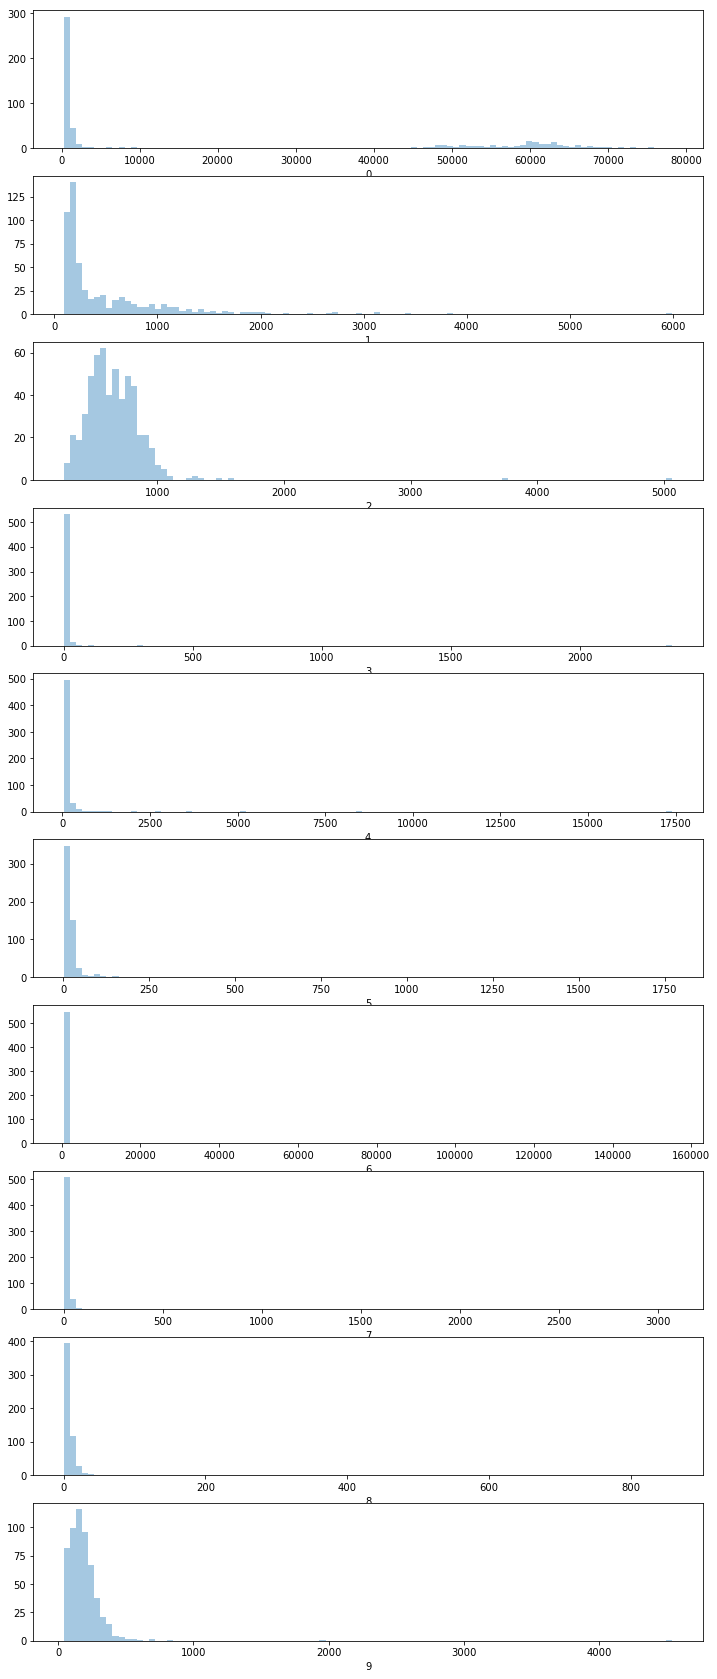

In [94]:
fig, axes = plt.subplots(10, figsize=(12,30))

for idx, sequence in sequences.iterrows():
    sns.distplot(sequence, kde=False, ax=axes[idx], bins=100)

plt.show()

Lets look at top 5 and bottom 5 (in terms of total count) 
_note that I've only loaded some of the rows of the data since I'm on my shitty laptop_

It's likely that the bottom ones are gonna just be all zeros so probably not worth looking at tbh

In [104]:
sums = train.sum(axis=1).sort_values(ascending=False)
top_idx = sums.head(8).index
bot_idx = sums.tail(2).index

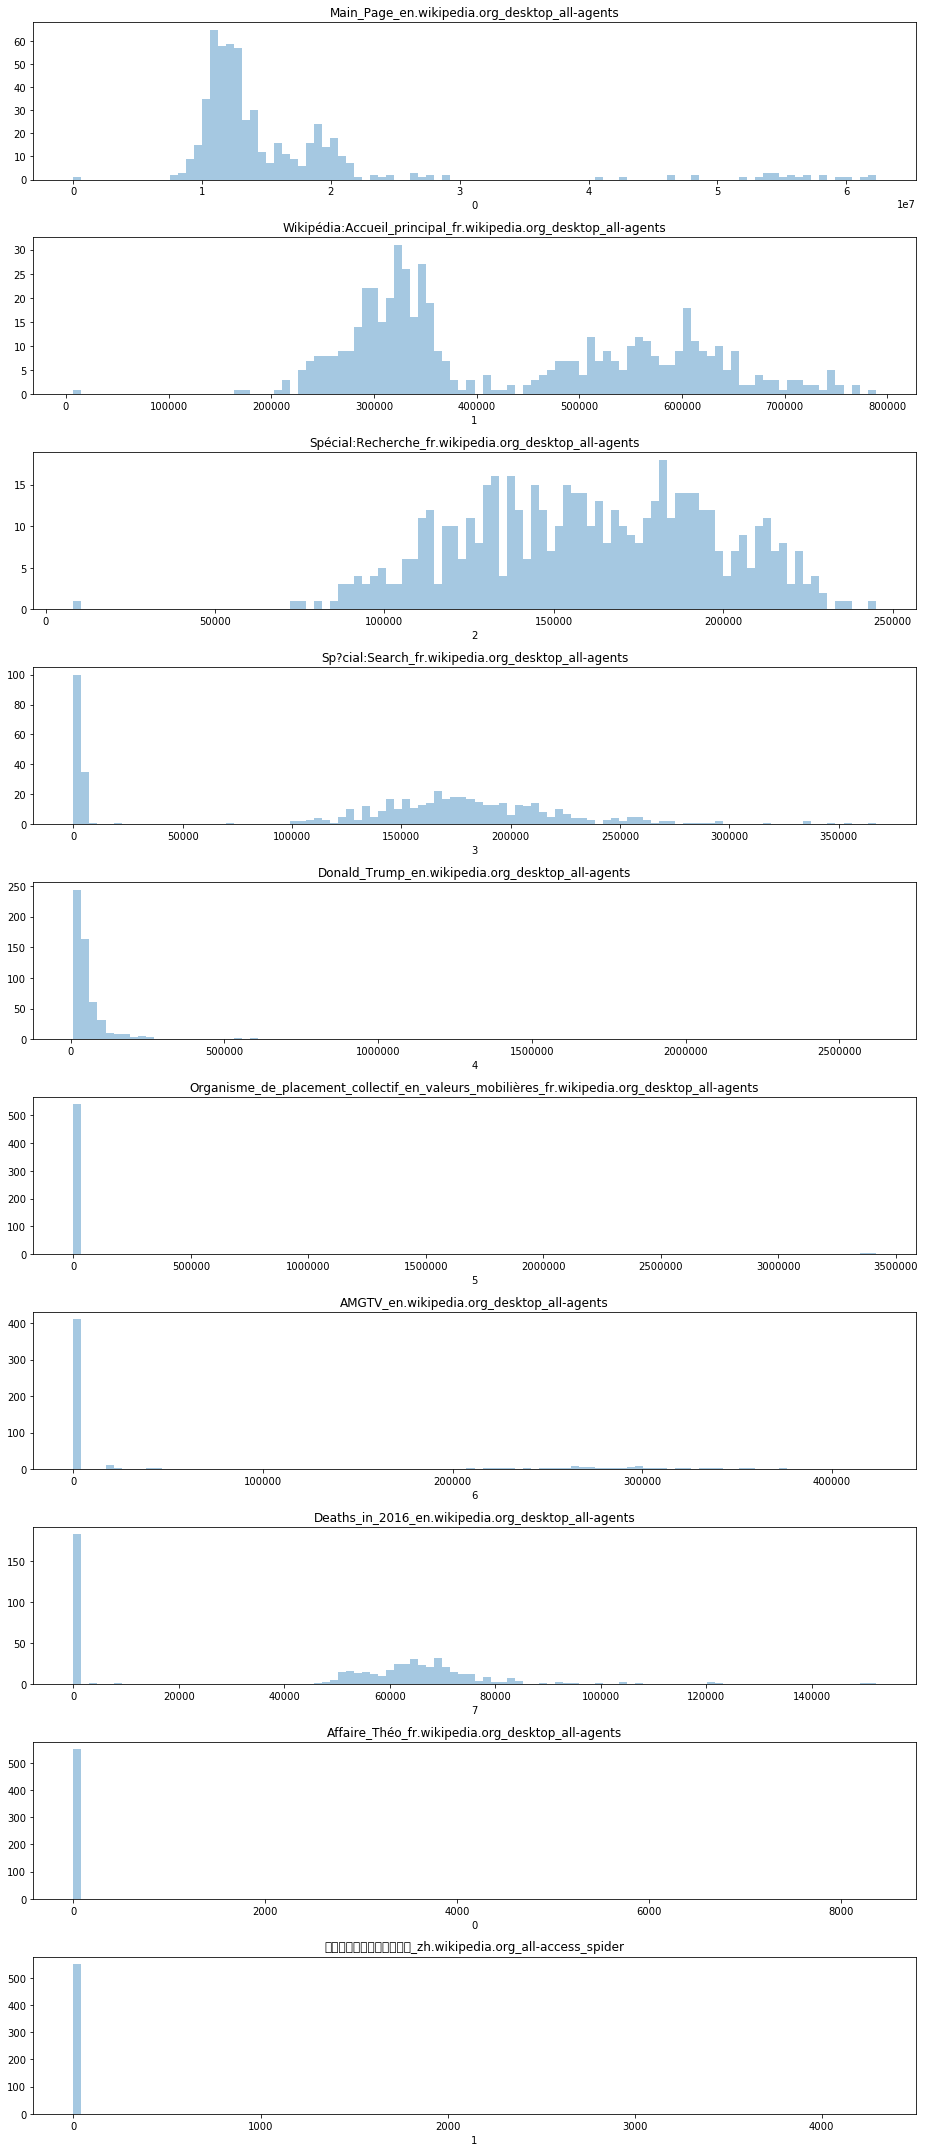

In [117]:
fig, axes = plt.subplots(10, figsize=(13,30))

for idx, sequence in train.iloc[top_idx].reset_index().iterrows():
    axes[idx].set_title(sequence['Page'])
    sns.distplot(sequence.drop('Page'), kde=False, ax=axes[idx], bins=100)
    
for idx, sequence in train.iloc[bot_idx].reset_index().iterrows():
    ax_idx = idx+8
    axes[ax_idx].set_title(sequence['Page'])
    sns.distplot(sequence.drop('Page'), kde=False, ax=axes[ax_idx], bins=100)
    
plt.tight_layout()
plt.show()

and over the whole dataset?

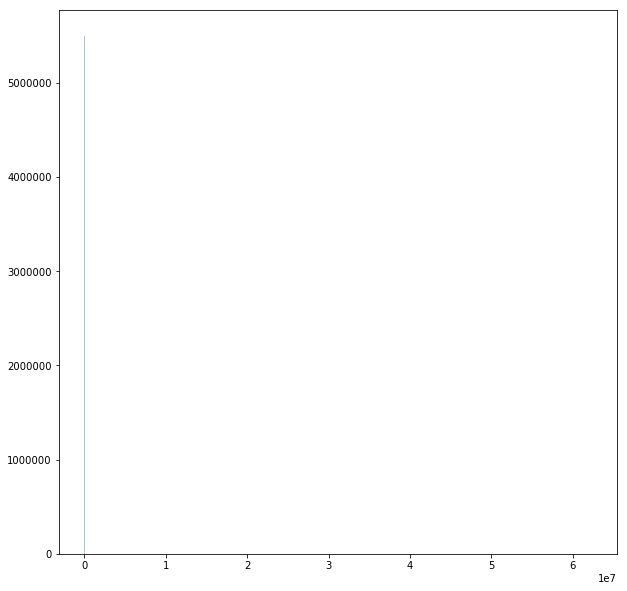

In [70]:
all_values = train.drop('Page', axis=1).values.flatten()
plt.figure(figsize=(10, 10))
sns.distplot(all_values, kde=False, bins=1000)

the small values skew it hugely, lets get rid of them for now

In [80]:
all_values_no_zero = np.array([v for v in all_values if v>10000])

In [81]:
all_values.shape

(5500000,)

In [82]:
all_values_no_zero.shape

(35403,)

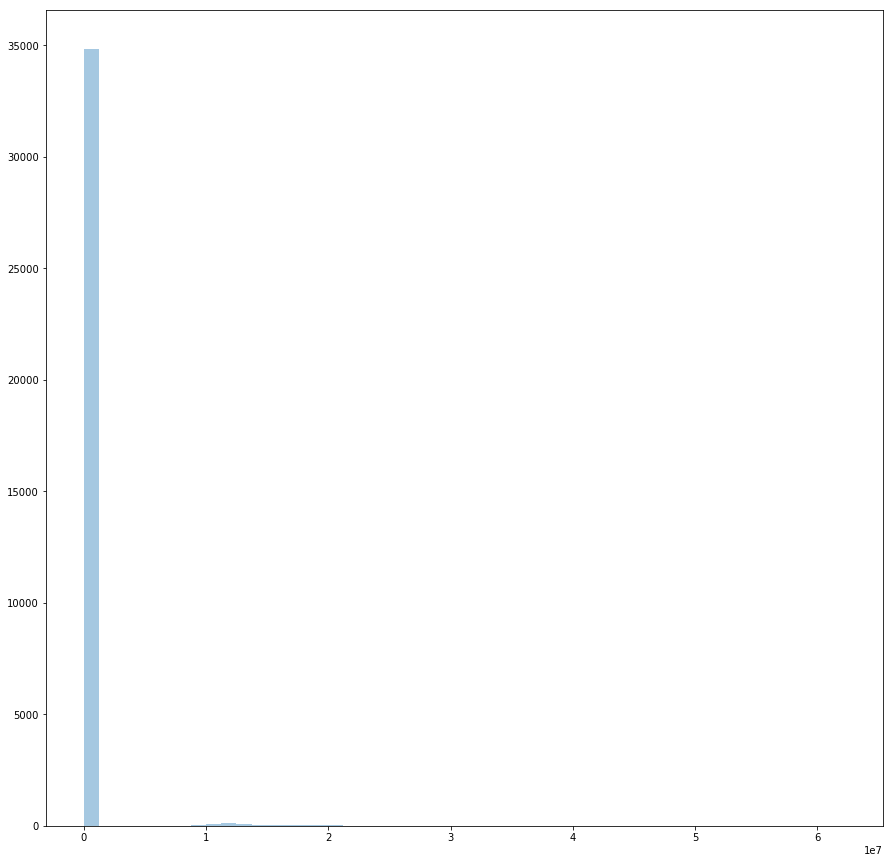

In [90]:
plt.figure(figsize=(15, 15))
sns.distplot(all_values_no_zero, kde=False)
plt.show()

Grim I need to check out wtf is happening there